In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path # modificar la lista de rutas de búsqueda que el intérprete de Python utiliza para buscar módulos y paquetes.
import os # interactua con el sistema operativo
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx


In [15]:
# Cargar los datos del archivo Excel
#df = pd.read_excel('ruta_del_archivo.xlsx')  # Reemplaza 'ruta_del_archivo.xlsx' por la ubicación real del archivo

df = pd.read_excel(open('../resources/exitososFallidosEnviosSol.xlsx','rb'))

df.head()

,exitosos,fallidos,envios,sol1
0,10,21,31,1.0
1,7,9,16,1.0
2,6,10,16,1.0
3,0,0,0,1.0
4,0,0,0,1.0


In [16]:
# Obtener los datos de entrada (características) y salida (objetivos)
X = df.iloc[:, :-1].values  # Todas las columnas excepto la última
y = df.iloc[:, -1].values   # Última columna

In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Crear el modelo de la red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Capa de entrada
model.add(Dense(64, activation='relu'))  # Capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida -- varia segun clasificacion  o regrecion-

In [19]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # si es clasificacion o regrecion cambia loss y metrics (Rcuadrado)

In [20]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
21/21 [==============================] - 1s 2ms/step - loss: -8.3066 - accuracy: 0.1326 
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: -60.1610 - accuracy: 0.1729
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: -143.5985 - accuracy: 0.1729
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: -302.9033 - accuracy: 0.1729
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: -587.5528 - accuracy: 0.1729
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: -1044.0580 - accuracy: 0.1729
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: -1743.4629 - accuracy: 0.1729
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: -2739.5398 - accuracy: 0.1729
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: -4059.8804 - accuracy: 0.1729
Epoch 10/10
21/21 [==============================] - 0s 2ms/step - loss: -5814.5889 - acc

In [21]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: -6993.9956 - accuracy: 0.1905


In [22]:
# Imprimir la precisión del modelo
print("Precisión del modelo: %.2f" % (accuracy * 100))

Precisión del modelo: 19.05


Epoch 1/10
21/21 [==============================] - 0s 1ms/step - loss: -8008.4253 - accuracy: 0.1729
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: -10739.9238 - accuracy: 0.1729
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: -13982.1182 - accuracy: 0.1729
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: -17970.3867 - accuracy: 0.1729
Epoch 5/10
21/21 [==============================] - 0s 3ms/step - loss: -22512.0723 - accuracy: 0.1729
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: -27803.6641 - accuracy: 0.1729
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: -33864.8984 - accuracy: 0.1729
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: -40767.7070 - accuracy: 0.1729
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: -48502.9609 - accuracy: 0.1729
Epoch 10/10
21/21 [==============================] - 0s 2ms/step - loss: -

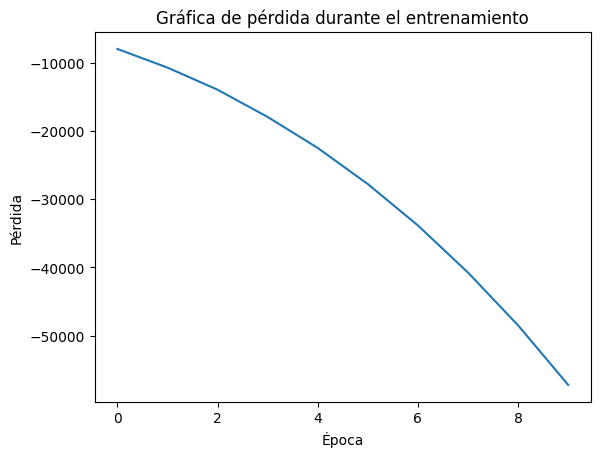

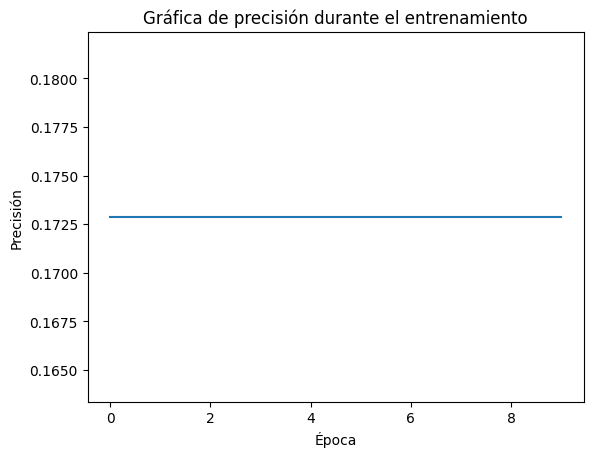

In [23]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Gráfica de pérdida
plt.plot(history.history['loss'])
plt.title('Gráfica de pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

# Gráfica de precisión
plt.plot(history.history['accuracy'])
plt.title('Gráfica de precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

6/6 [==============================] - 0s 2ms/step


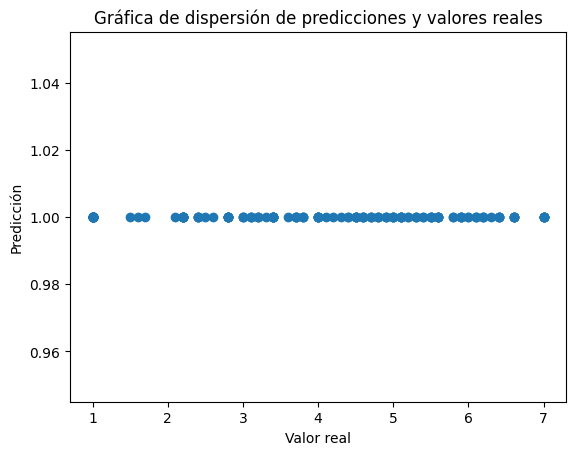

In [24]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Crear una gráfica de dispersión de predicciones y valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Gráfica de dispersión de predicciones y valores reales')
plt.show()